In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import itertools
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load the dataset from sklearn dataset
data = load_iris().data

In [ ]:
# See the data dimensions
data.shape

(150, 4)

In [ ]:
# extract the class labels
labels = load_iris().target

In [ ]:
# Check the dimensions of the data
labels.shape

(150,)

In [ ]:
# data is a 2-d array, we have to reshape the labels also to a 2-d array.
labels = np.reshape(labels,(150,1))

In [ ]:
# comebine the input and output variables
data = np.concatenate([data,labels],axis=-1)
# check the data dimensions again
data.shape

In [ ]:
# define the columns name for dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
# combine the data and column names again
dataset = pd.DataFrame(data,columns=names)

# cleaning the data with replacing the values based on the code below
dataset['species'].replace(0, 'Iris-setosa',inplace=True)
dataset['species'].replace(1, 'Iris-versicolor',inplace=True)
dataset['species'].replace(2, 'Iris-virginica',inplace=True)

# Check the temporary dataset again
dataset.head(5)

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


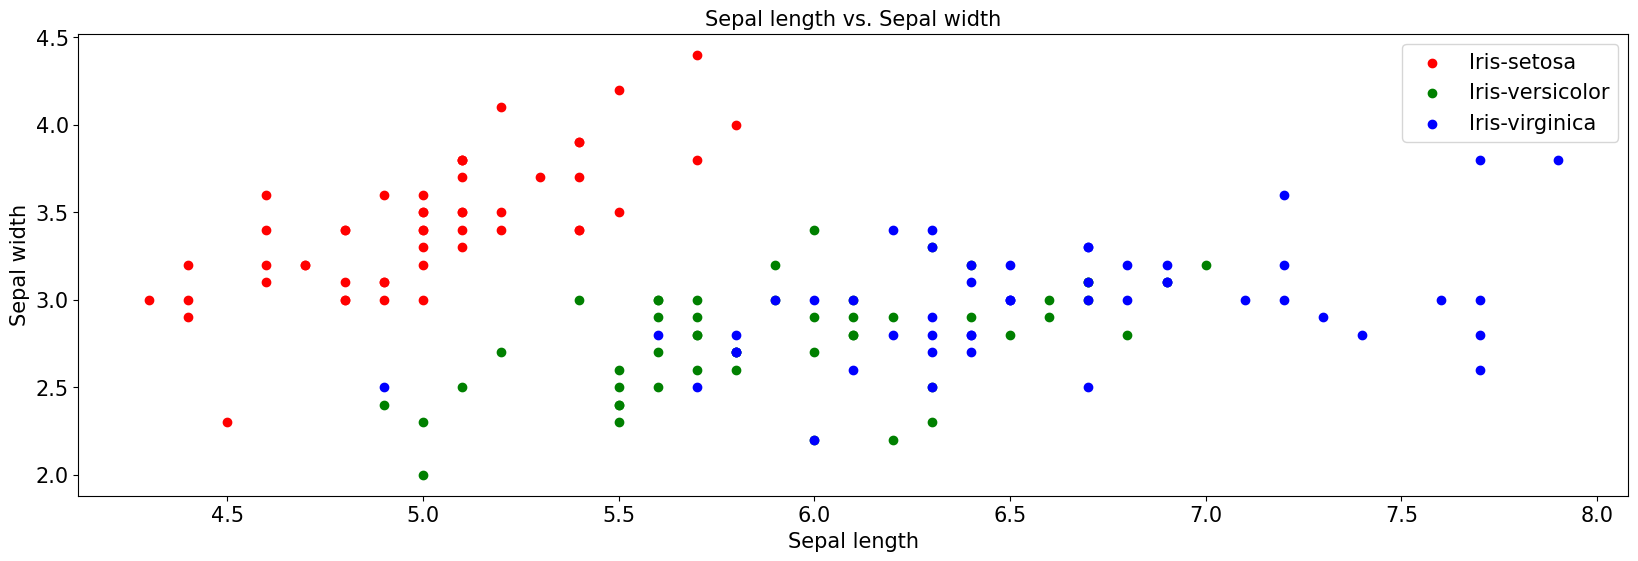

In [ ]:
# Using the matplotlib to visaulize the data with different label

# Create a new figure with the specified size
plt.figure(4, figsize=(20, 6))
# Scatter plot for the first 50 samples (Iris-setosa) with red color
plt.scatter(data[:50, 0], data[:50, 1], c='r', label='Iris-setosa')
# Scatter plot for the next 50 samples (Iris-versicolor) with green color
plt.scatter(data[50:100, 0], data[50:100, 1], c='g', label='Iris-versicolor')
# Scatter plot for the remaining samples (Iris-virginica) with blue color
plt.scatter(data[100:, 0], data[100:, 1], c='b', label='Iris-virginica')
# Set the x-axis label with a specified font size
plt.xlabel('Sepal length', fontsize=15)
# Set the y-axis label with a specified font size
plt.ylabel('Sepal width', fontsize=15)
# Set the x-axis tick labels' font size
plt.xticks(fontsize=15)
# Set the y-axis tick labels' font size
plt.yticks(fontsize=15)
# Set the title of the plot with a specified font size
plt.title('Sepal length vs. Sepal width', fontsize=15)
# Add a legend with a specified font size for the labels
plt.legend(prop={'size': 15})
# Display the plot
plt.show()

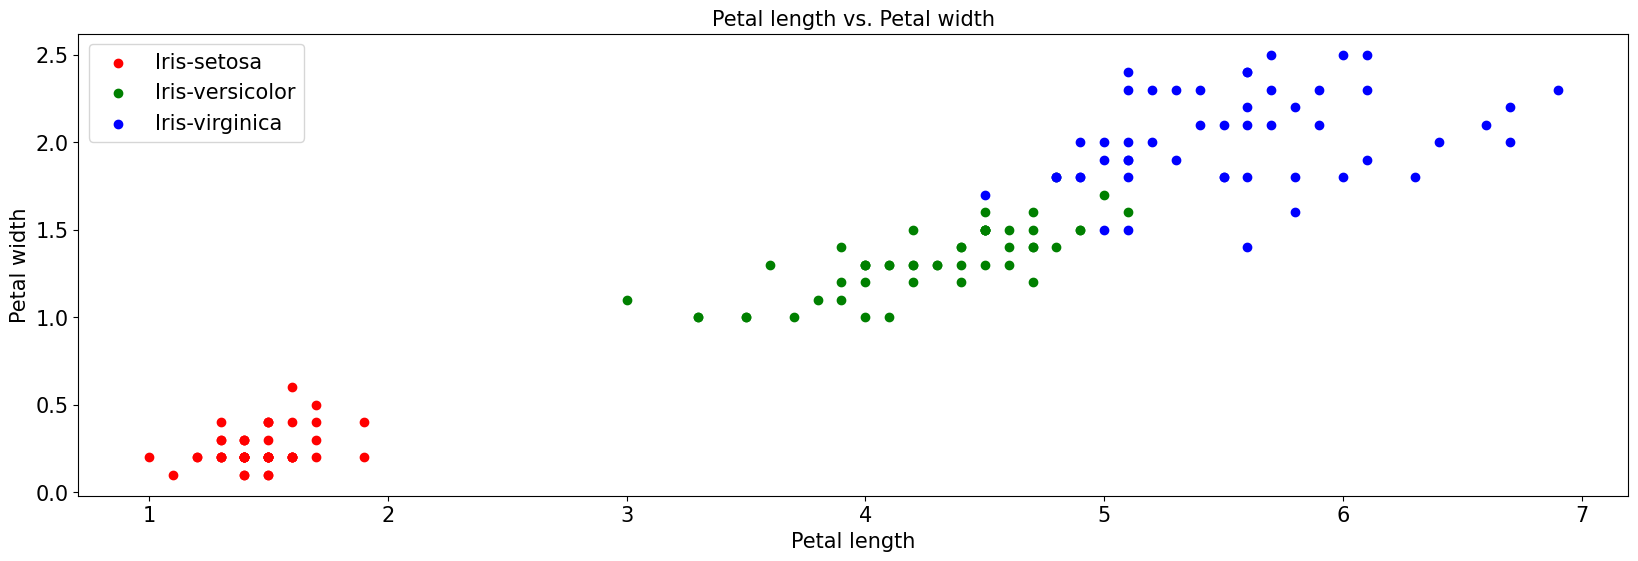

In [ ]:
# Using the matplotlib to visaulize the data with different label

# Create a new figure with the specified size
plt.figure(4, figsize=(20, 6))
# Scatter plot for the first 50 samples (Iris-setosa) with red color
plt.scatter(data[:50, 2], data[:50, 3], c='r', label='Iris-setosa')
# Scatter plot for the next 50 samples (Iris-versicolor) with green color
plt.scatter(data[50:100, 2], data[50:100, 3], c='g', label='Iris-versicolor')
# Scatter plot for the remaining samples (Iris-virginica) with blue color
plt.scatter(data[100:, 2], data[100:, 3], c='b', label='Iris-virginica')
# Set the x-axis label with a specified font size
plt.xlabel('Petal length', fontsize=15)
# Set the y-axis label with a specified font size
plt.ylabel('Petal width', fontsize=15)
# Set the x-axis tick labels' font size
plt.xticks(fontsize=15)
# Set the y-axis tick labels' font size
plt.yticks(fontsize=15)
# Set the title of the plot with a specified font size
plt.title('Petal length vs. Petal width', fontsize=15)
# Add a legend with a specified font size for the labels
plt.legend(prop={'size': 15})
# Display the plot
plt.show()

In [ ]:
# calculate the dataset correlations
setosa_subset = dataset.iloc[:50, :]
setosa_numeric_subset = setosa_subset.select_dtypes(include='number')

# Calculate the correlation matrix
setosa_correlation_matrix = setosa_numeric_subset.corr()
print(setosa_correlation_matrix)

              sepal-length  sepal-width  petal-length  petal-width
sepal-length      1.000000     0.742547      0.267176     0.278098
sepal-width       0.742547     1.000000      0.177700     0.232752
petal-length      0.267176     0.177700      1.000000     0.331630
petal-width       0.278098     0.232752      0.331630     1.000000


In [ ]:
# calculate the dataset correlations
versicolor_subset = dataset.iloc[50:100,:]
versicolor_numeric_subset = versicolor_subset.select_dtypes(include='number')

# Calculate the correlation matrix
versicolor_correlation_matrix = versicolor_numeric_subset.corr()
print(versicolor_correlation_matrix)

              sepal-length  sepal-width  petal-length  petal-width
sepal-length      1.000000     0.525911      0.754049     0.546461
sepal-width       0.525911     1.000000      0.560522     0.663999
petal-length      0.754049     0.560522      1.000000     0.786668
petal-width       0.546461     0.663999      0.786668     1.000000


In [ ]:
# calculate the dataset correlations
virginica_subset = dataset.iloc[100:,:]
virginica_numeric_subset = virginica_subset.select_dtypes(include='number')

# Calculate the correlation matrix
virginica_correlation_matrix = virginica_numeric_subset.corr()
print(virginica_correlation_matrix)

              sepal-length  sepal-width  petal-length  petal-width
sepal-length      1.000000     0.457228      0.864225     0.281108
sepal-width       0.457228     1.000000      0.401045     0.537728
petal-length      0.864225     0.401045      1.000000     0.322108
petal-width       0.281108     0.537728      0.322108     1.000000


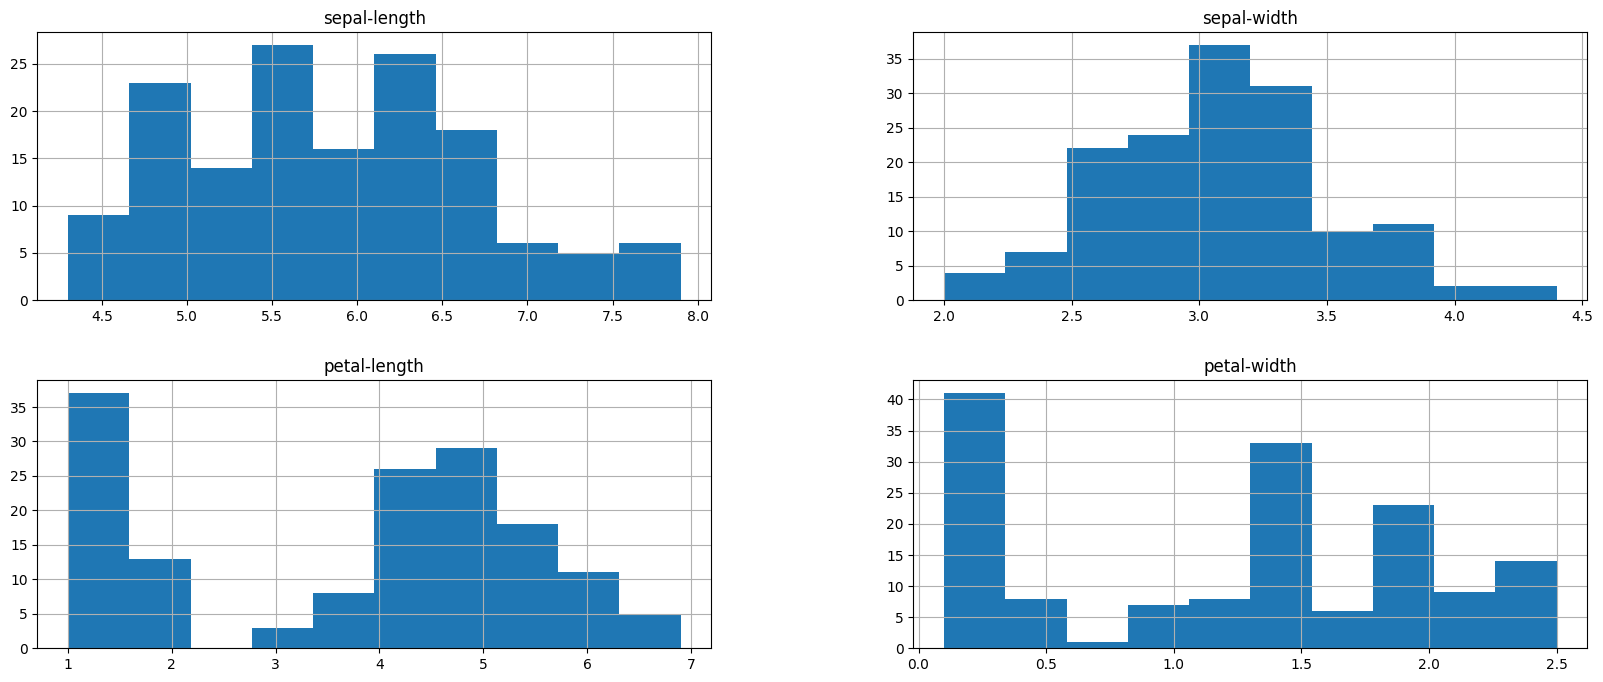

In [ ]:
# Create a figure with a specified size
fig = plt.figure(figsize = (20,8))
# Create an Axes object for the plot
ax = fig.gca()
# Generate histograms for each numeric column in the DataFrame
dataset.hist(ax=ax)
# Display the plot
plt.show()

In [ ]:
# Get descriptive statistics

dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Group the dataset by the 'species' column and count the number of occurrences in each group

print(dataset.groupby('species').size())

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [ ]:
# Split the dataset into training and testing sets
# dataset.iloc[:, :3] selects the first three columns as features
# dataset.iloc[:, 3] selects the fourth column as the labels
# test_size=0.2 specifies that 20% of the data should be used for testing
# random_state=42 ensures reproducibility of the split
train_data, test_data, train_label, test_label = train_test_split(dataset.iloc[:,:3], dataset.iloc[:,3], test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets and labels
train_data.shape, train_label.shape, test_data.shape, test_label.shape

((120, 3), (120,), (30, 3), (30,))

In [ ]:
# Create an array of neighbor values from 1 to 8
neighbors = np.arange(1, 9)

# Initialize arrays to hold training and testing accuracy for each neighbor value
train_accuracy = np.zeros(len(neighbors))
test_accuracy = np.zeros(len(neighbors))


In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Assuming train_label and test_label are continuous
# Example: Binning continuous labels into categories

# Define the number of bins
num_bins = 3

# Binning the labels into discrete categories
train_label_binned = np.digitize(train_label, bins=np.linspace(min(train_label), max(train_label), num_bins))
test_label_binned = np.digitize(test_label, bins=np.linspace(min(test_label), max(test_label), num_bins))

# Initialize arrays to store accuracy
train_accuracy = np.zeros(len(neighbors))
test_accuracy = np.zeros(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the model
    knn.fit(train_data, train_label_binned)

    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(train_data, train_label_binned)

    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(test_data, test_label_binned)


print("**"*50)
print("TRAINING ACCURACY SCORE: ", train_accuracy)
print("**"*50)
print("\n\n")

print("**"*50)
print("TRAINING ACCURACY SCORE: ", test_accuracy)
print("**"*50)
print("\n\n")

****************************************************************************************************
TRAINING ACCURACY SCORE:  [0.99 0.92 0.96 0.93 0.93 0.93 0.93 0.93]
****************************************************************************************************



****************************************************************************************************
TRAINING ACCURACY SCORE:  [0.77 0.77 0.83 0.8  0.87 0.83 0.83 0.83]
****************************************************************************************************





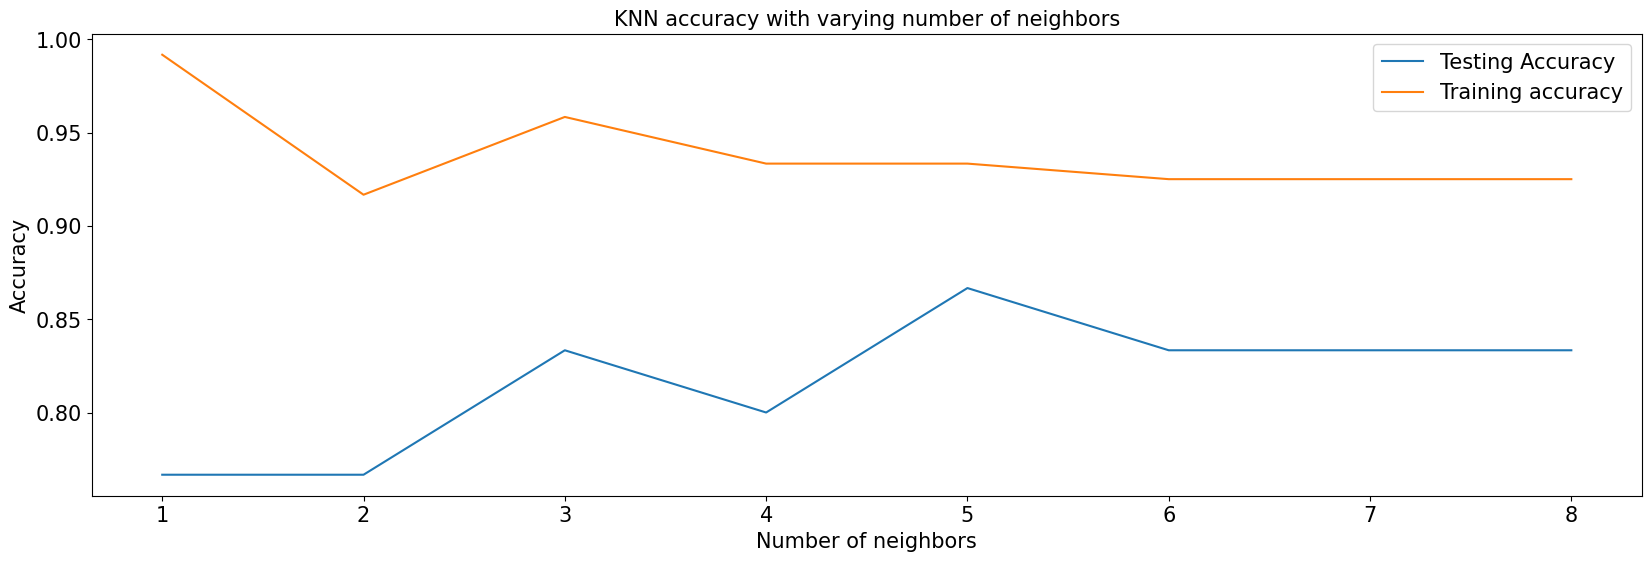

In [ ]:
# Create a new figure with a specified size
plt.figure(figsize=(20, 6))

# Set the title of the plot with a specified font size
plt.title('KNN accuracy with varying number of neighbors', fontsize=15)
# Plot testing accuracy against the number of neighbors
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
# Plot training accuracy against the number of neighbors
plt.plot(neighbors, train_accuracy, label='Training accuracy')
# Add a legend with a specified font size for the labels
plt.legend(prop={'size': 15})
# Set the x-axis label with a specified font size
plt.xlabel('Number of neighbors', fontsize=15)
# Set the y-axis label with a specified font size
plt.ylabel('Accuracy', fontsize=15)
# Set the font size of the x-axis tick labels
plt.xticks(fontsize=15)
# Set the font size of the y-axis tick labels
plt.yticks(fontsize=15)
# Display the plot
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

#Fit the model
knn.fit(train_data, train_label_binned)

#Compute accuracy on the training set
train_accuracy = knn.score(train_data, train_label_binned)
print("**"*50)
print("TRAINING ACCURACY SCORE: ", train_accuracy)
print("**"*50)
print("\n\n")

# Compute accuracy on the test set
test_accuracy = knn.score(test_data, test_label_binned)
print("**"*50)
print("TESTING ACCURACY SCORE: ", test_accuracy)
print("**"*50)

****************************************************************************************************
TRAINING ACCURACY SCORE:  0.9583333333333334
****************************************************************************************************



****************************************************************************************************
TESTING ACCURACY SCORE:  0.8333333333333334
****************************************************************************************************


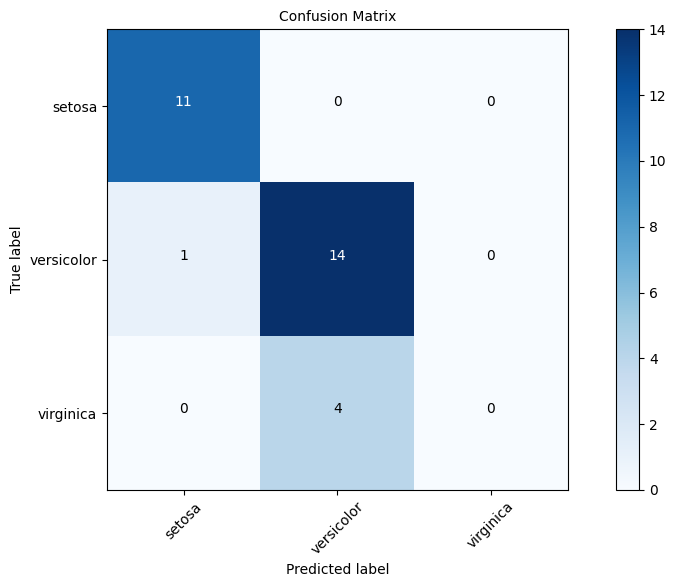

In [ ]:
# Start creating the prediction
prediction = knn.predict(test_data)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    # Display the confusion matrix as an image
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))

    # Set the tick marks on x-axis and y-axis
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Set the format for the values in the cells of the confusion matrix
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    # Add text annotations for each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    # Set labels for x-axis and y-axis
    plt.ylabel('True label', fontsize=10)
    plt.xlabel('Predicted label', fontsize=10)

    # Adjust layout for better appearance
    plt.tight_layout()

    # Set font sizes for tick labels
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

# Get class names from the dataset
class_names = load_iris().target_names

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_label_binned, prediction)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 6))
plot_confusion_matrix(cnf_matrix, classes=class_names)
plt.title('Confusion Matrix', fontsize=10)
plt.show()

In [ ]:
# Print a classification report comparing the actual labels (test_label_binned) with the predicted labels (prediction)
print("**"*80)
print(classification_report(test_label_binned, prediction))
print("**"*80)

****************************************************************************************************************************************************************
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        11
           2       0.78      0.93      0.85        15
           3       0.00      0.00      0.00         4

    accuracy                           0.83        30
   macro avg       0.56      0.64      0.60        30
weighted avg       0.72      0.83      0.77        30

****************************************************************************************************************************************************************
